Specifically, use the tools at hand to determine:
    1. which clustering solution, including number of clusters and algorithm used, is best for the marathon data. 
    2. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. 
    3. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist

In [21]:
site = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
data = pd.read_csv(site, sep=',')

In [22]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [23]:
print(data.shape)
print(data.shape[0]/4)

(31984, 21)
7996.0


So our rows divide evenly into 4

In [24]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [25]:
for column in data.columns:
    print(column)
    print(data[column].isna().value_counts())
    print()

10k
False    31984
Name: 10k, dtype: int64

name
False    31984
Name: name, dtype: int64

division
False    31984
Name: division, dtype: int64

25k
False    31984
Name: 25k, dtype: int64

gender
False    31984
Name: gender, dtype: int64

age
False    31984
Name: age, dtype: int64

official
False    31984
Name: official, dtype: int64

bib
False    31984
Name: bib, dtype: int64

genderdiv
False    31984
Name: genderdiv, dtype: int64

ctz
True     30740
False     1244
Name: ctz, dtype: int64

35k
False    31984
Name: 35k, dtype: int64

overall
False    31984
Name: overall, dtype: int64

pace
False    31984
Name: pace, dtype: int64

state
False    29408
True      2576
Name: state, dtype: int64

30k
False    31984
Name: 30k, dtype: int64

5k
False    31984
Name: 5k, dtype: int64

half
False    31984
Name: half, dtype: int64

20k
False    31984
Name: 20k, dtype: int64

country
False    31984
Name: country, dtype: int64

city
False    31983
True         1
Name: city, dtype: int64

40k
False  

In [26]:
data.ctz.unique()

array([nan, 'KOR', 'MEX', 'ECU', 'CPV', 'AUS', 'CAN', 'NZL', 'ROU', 'GER',
       'DEN', 'GBR', 'FRA', 'IRL', 'JPN', 'RSA', 'ITA', 'GUA', 'ESP',
       'CHN', 'LAT', 'ARG', 'TUR', 'BRA', 'KEN', 'CRC', 'RUS', 'NED',
       'USA', 'BIH', 'PHI', 'SUI', 'SRI', 'MAR', 'SWE', 'SVK', 'VEN',
       'HUN', 'NEP', 'IND', 'PER', 'GEO', 'DOM', 'CMR', 'COL', 'NOR',
       'TRI', 'AUT', 'KSA', 'TPE', 'HKG', 'ERI', 'SLO', 'PAR', 'CZE',
       'ZIM', 'UKR', 'BEL', 'POR', 'MLT', 'MAS', 'FIN', 'ALG', 'IRI',
       'NCA', 'ETH', 'ISR', 'ISL', 'CHI', 'ESA', 'BLR', 'SIN', 'HAI',
       'POL', 'GUY', 'GRE', 'IRQ', 'BER', 'PAK', 'URU', 'UGA', 'CRO',
       'PAN', 'BAR', 'LIB'], dtype=object)

In [27]:
data.state.unique()

array([nan, 'CA', 'ON', 'MI', 'QC', 'IL', 'OR', 'AZ', 'CO', 'VA', 'GA',
       'NJ', 'ME', 'MA', 'UT', 'NY', 'MO', 'RI', 'NH', 'MT', 'KY', 'FL',
       'TN', 'AB', 'WA', 'WI', 'DC', 'PA', 'OH', 'IN', 'NS', 'MD', 'IA',
       'MN', 'CT', 'SD', 'TX', 'DE', 'LA', 'NC', 'OK', 'NV', 'AL', 'KS',
       'NE', 'MB', 'HI', 'AK', 'NM', 'BC', 'VT', 'ID', 'SC', 'WV', 'PE',
       'ND', 'MS', 'AR', 'SK', 'NT', 'PR', 'WY', 'NB', 'YT', 'NL', 'AE',
       'AA', 'AP', 'GU'], dtype=object)

Not sure if these are appropriate measures, but I plan to drop the "ctz" column, because most of its values are null, and convert all null values of the "state" column to 'unknown.'

In [28]:
# Drop the "ctz" column, replace nan in "state" column with 'unknown', replace '-' in the
# "_k" columns with 0
data.drop('ctz', axis=1, inplace=True)
data.replace(np.nan, 'unknown', inplace=True, regex=True)
data.replace('-', 0, inplace=True, regex=True)

In [29]:
# Setup X and y variables for modeling, drop name from predictors as it will not be helpful
X = data.drop(['overall', 'name'], axis=1)

# Normalize both target and predictors
X_norm = MinMaxScaler().fit_transform(X[['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k', 'pace', '30k', '5k', 'half', '20k', '40k']])
y_norm = MinMaxScaler().fit_transform(data[['overall']])

### Divide data into 4 even subsets to test for model consistency

In [31]:
# Perform PCA for graphic representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Create 4 equal data subsets to test our clustering and models on
X_1, X_2, X_pca1, X_pca2 = train_test_split(X_norm, X_pca, test_size=0.5, random_state=5588)

# Create final groupings
X1, X2, XPCA1, XPCA2 = train_test_split(X_1, X_pca1, test_size=0.5, random_state=5588)
X3, X4, XPCA3, XPCA4 = train_test_split(X_2, X_pca2, test_size=0.5, random_state=5588)

subsets = [X1, X2, X3, X4]

### Run KMeans consistency analysis with plotting

In [32]:
ypred = pd.DataFrame()

for counter, vals in enumerate([
    (X1, XPCA1),
    (X2, XPCA2),
    (X3, XPCA3),
    (X4, XPCA4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = vals[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = vals[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 6.
    for nclust in range(2, 7):
        pred = KMeans(n_clusters=nclust, random_state=5588).fit_predict(vals[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

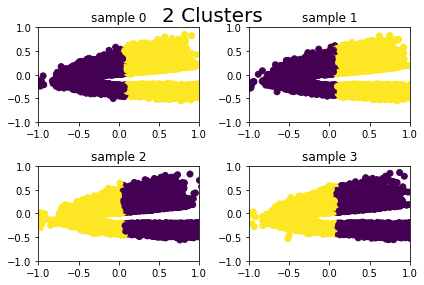

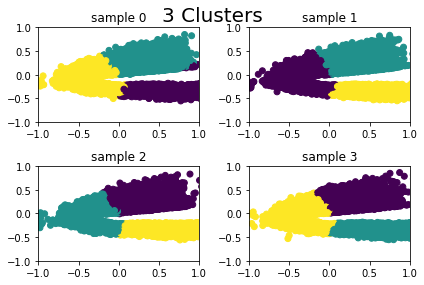

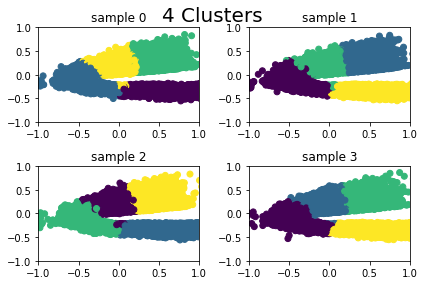

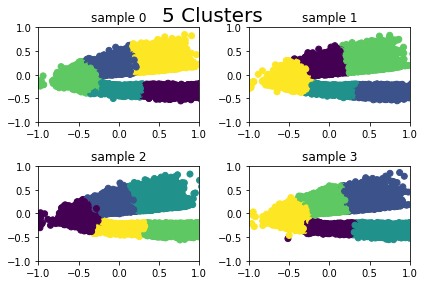

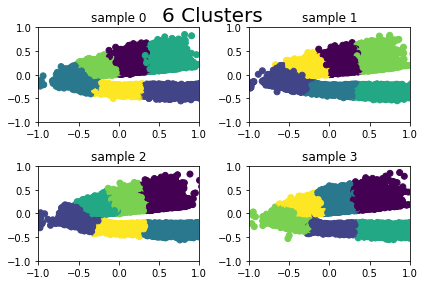

In [33]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 7):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-1, 1])
        axarr[rows, cols].set_ylim([-1, 1])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

It appears to me that 3 clusters provides the best balance of number of clusters and consistency across data subsets. 4 clusters is also pretty good. Once you get above 4 clusters, boundaries start to shift a lot more.

### I don't see any means of measuring ARI on this data set, as we are using a numerical variable, so I will move on to assessing the Silhouette Coefficient using KMeans

In [34]:
for cluster in range(2, 7 ):
    print()
    print("{} clusters:".format(cluster))
    for sample in subsets:
        model = KMeans(n_clusters=cluster, random_state=42).fit(sample)
        labels = model.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))


2 clusters:
0.4085381684502807
0.4090150130837053
0.40113591699258994
0.4094132707728613

3 clusters:
0.4072767341016133
0.4117069255521189
0.41035400954825896
0.4100159205441416

4 clusters:
0.3498407797110505
0.34960267962115266
0.3429406028594667
0.34904980787400164

5 clusters:
0.36057387078879516
0.36042825353885394
0.36254255559202364
0.3593808485834576

6 clusters:
0.33099753836320533
0.33056028694279194
0.3297286630882226
0.32628730009426804


### Looks like the 3 cluster model wins just slightly over the 2 cluster. The scores are all pretty consistent across the 4 subsets of the data as well, which is positive.

### KMeans Elbow Method

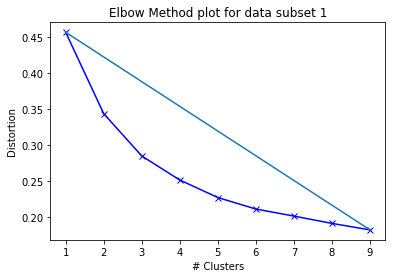

Optimal number of clusters: 3


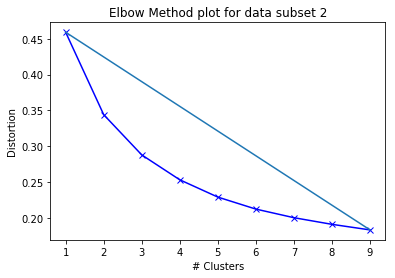

Optimal number of clusters: 4


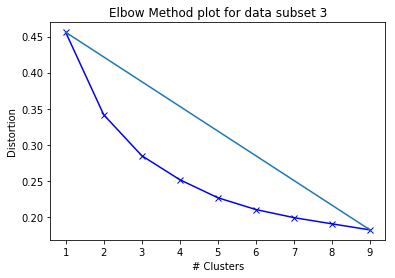

Optimal number of clusters: 3


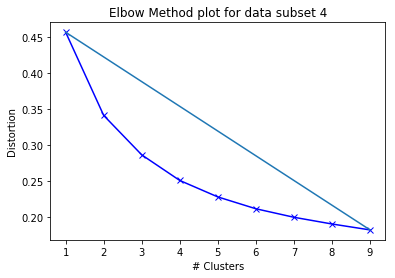

Optimal number of clusters: 4


In [37]:
# Loop through all 4 subsets of the data
it = 1
K = range(1, 10)
for X in subsets:
    # Determine distortion for each value of k clusters
    distortions = []
    for k in K:
        k_mean_model = KMeans(n_clusters=k).fit(X)
        k_mean_model.fit(X)  # Why do we need to fit X again after we already assign a fit model?
        distortions.append(np.sum(np.min(cdist(X, k_mean_model.cluster_centers_, 'euclidean'),
                                         axis=1))/X.shape[0])
    
    # Create coordinates for line segment to plot start point to end point
    x1, y1 = 1, distortions[0]
    x2, y2 = 9, distortions[-1]
    
    # Plot elbow
    plt.plot(K, distortions, 'bx-')
    plt.plot((x1, x2), (y1, y2))
    plt.title('Elbow Method plot for data subset {}'.format(it))
    plt.xlabel('# Clusters')
    plt.ylabel('Distortion')
    plt.show()
    
    # Determing optimal cluster size, best balance between within-cluster homogeneity and 
    # cluster diversity by finding point furthest from straight line (x1, y1), (x2, y2)
    distances = []
    for i in range(len(distortions)):
        x0 = i + 1
        y0 = distortions[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2* x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
        distances.append(numerator/denominator)
    # Return best n_clusters value
    print('Optimal number of clusters:', distances.index(max(distances)) + 1)
    it += 1

We have undecided elbow method plots between the 4 subsets of data. Based on all the methods together as well as the plotting above, I would say 3 clusters would be best. The Silhouette Coefficient tipped the scales.

## Create KMeans model with ideal n_clusters and evaluate entired data set

In [35]:
import itertools

y_norm = np.array(list(itertools.chain.from_iterable(y_norm)))

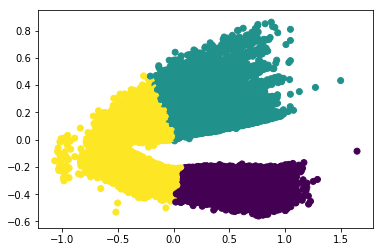

Comparing k-means clusters against the data:
col_0  0.000000  0.000031  0.000063  0.000094  0.000125  0.000157  0.000188  \
row_0                                                                         
0             0         0         0         0         0         0         0   
1             0         0         0         0         0         0         0   
2             2         2         2         2         2         2         2   

col_0  0.000219  0.000251  0.000282  ...  0.999718  0.999749  0.999781  \
row_0                                ...                                 
0             0         0         0  ...         0         0         0   
1             0         0         0  ...         1         1         1   
2             2         2         2  ...         0         0         0   

col_0  0.999812  0.999843  0.999875  0.999906  0.999937  0.999969  1.000000  
row_0                                                                        
0             0         1       

In [36]:
best_kmean = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,
                    tol=0.0001, n_jobs=-1, random_state=5588)
y_pred = best_kmean.fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_norm))

In [167]:
data['cluster'] = y_pred + 1

In [168]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,pace,state,30k,5k,half,20k,country,city,40k,cluster
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,3.27,unknown,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,3
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,5.30,unknown,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,3
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,...,3.08,unknown,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,3
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,...,5.37,unknown,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,3
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,3.10,unknown,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,3


### Run Times (5k, 10k, 20k, half, 25k, 30k, 35k, 40k, official)

In [169]:
# Need all of our time columns to be numeric not objects
dist_col = ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']
for column in dist_col:
    data[column] = data[column].astype(float)

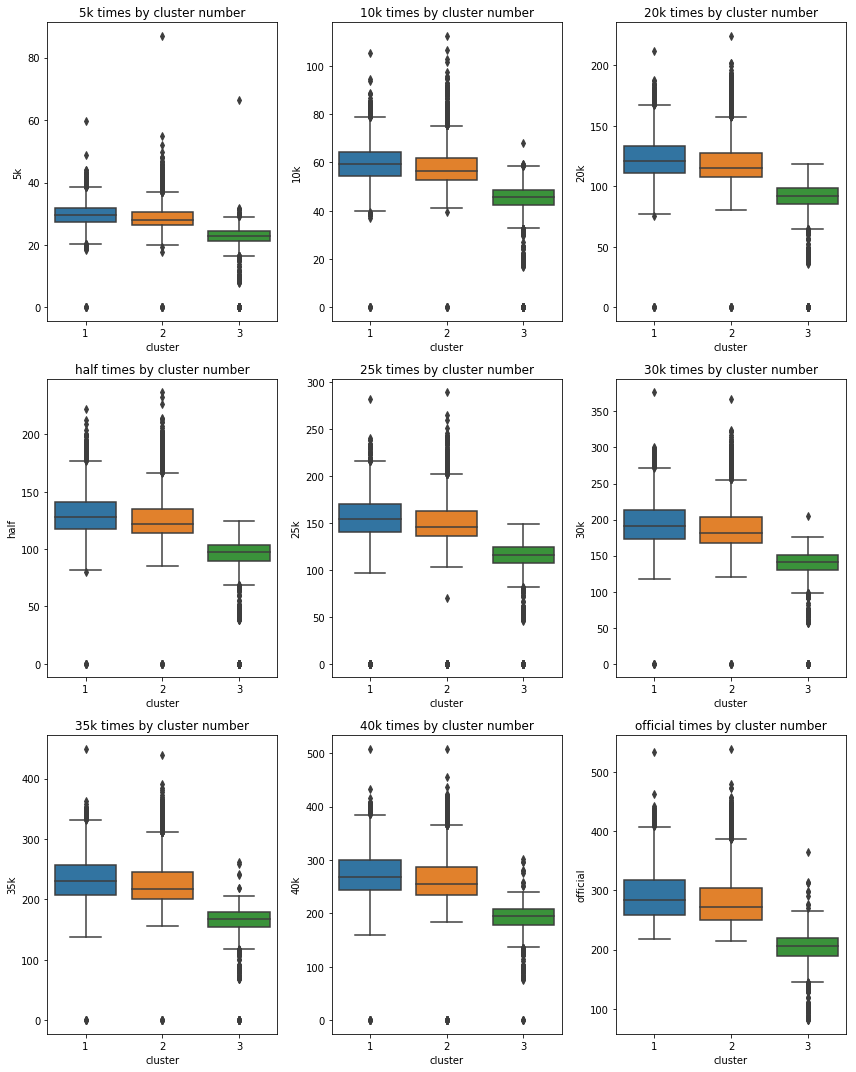

In [170]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='cluster', y=dist, data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

The configuration of the boxplots remains impressively consistent across all measures of distance. Runners in cluster 3 tend to be much faster than cluster 1 or 2. Cluster 2 tends to be a bit faster than cluster 1. 

Next we'll look at gender, starting with the distribution for each cluster.

### Gender

In [190]:
# need to find percentage of men and women per cluster.
gender = pd.DataFrame(columns=['F', 'M'])
gender.loc['cluster_1'] = data[data['cluster']==1].groupby('gender').count()['cluster']/data[data['cluster']==1].count()['cluster']
gender.loc['cluster_2'] = data[data['cluster']==2].groupby('gender').count()['cluster']/data[data['cluster']==2].count()['cluster']
gender.loc['cluster_3'] = data[data['cluster']==3].groupby('gender').count()['cluster']/data[data['cluster']==3].count()['cluster']

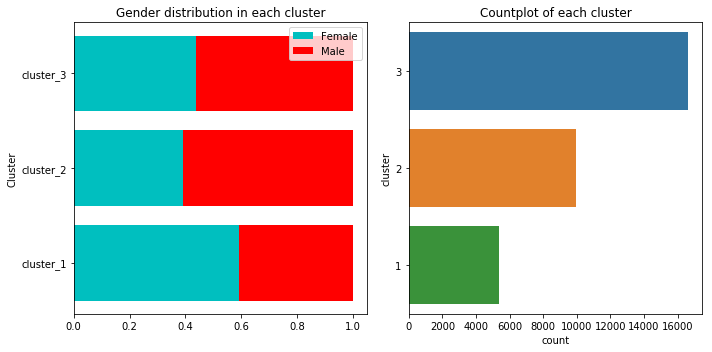

In [198]:
plt.subplots(1, 2, figsize=(10, 5))

# Stacked horizontal bar chart of percentages
plt.subplot(1, 2, 1)
plt.barh(gender.index, gender.F, color='c', label='Female')
plt.barh(gender.index, gender.M, left=gender.F, color='r', label='Male')
plt.title('Gender distribution in each cluster')
plt.ylabel('Cluster')
plt.legend()

# Countplot of clusters
plt.subplot(1, 2, 2)
sns.countplot(y='cluster', data=data, order=[3, 2, 1])
plt.title("Countplot of each cluster")
plt.tight_layout()
plt.show()

Interesting results here. We can see there are many more marathon participants who are male - clusters 2 and 3, both predominantly male, have the higher member counts. Female participants are only the majority in cluster 1, which has the lowest member count of the 3.

I'm also curious to see what the run times plots we created above look like when the two genders are separated.

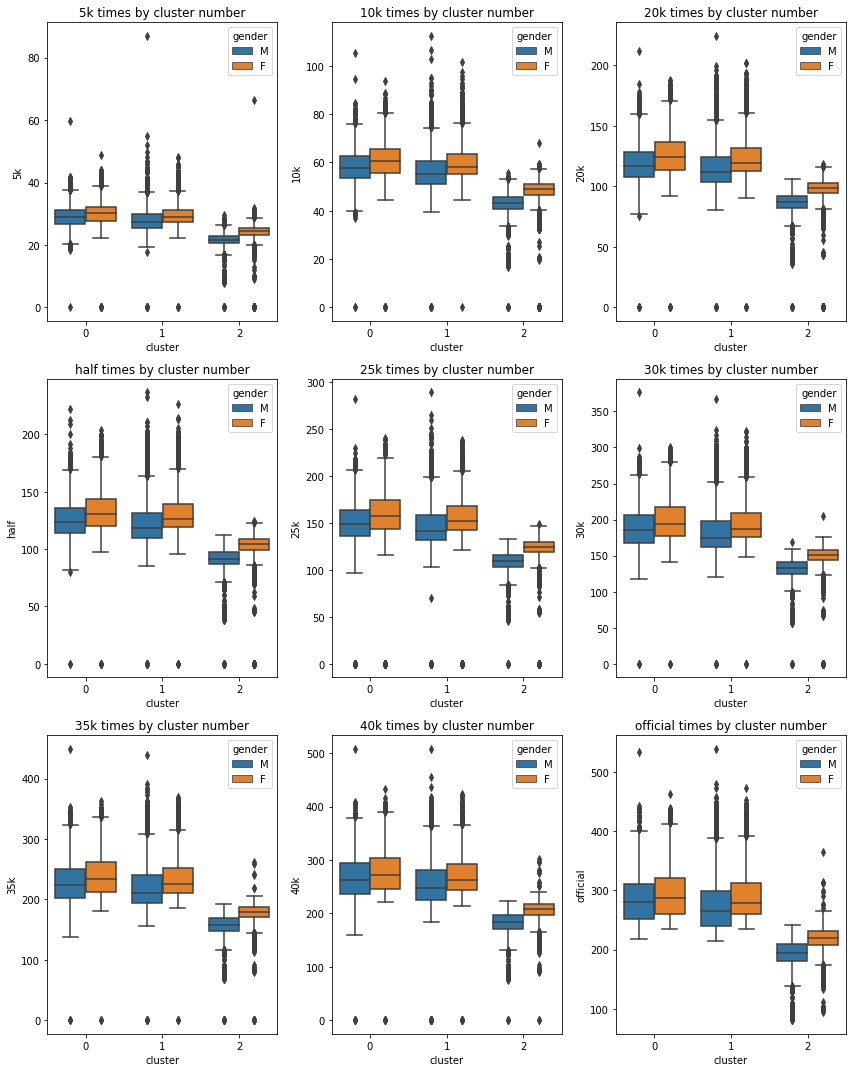

In [41]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='cluster', y=dist, hue='gender', data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

Here we see that male runners have consistently lower median times in all distance groupings than female runners for each of the 3 clusters. There is a greater gender discrepancy in cluster 3 than 1 or 2. And the IQR is shorter for cluster 3.

We still haven't found anything that greatly differentiates clusters 1 and 2. Hopefully we'll find something next, as we continue our bivariate plots with the 'cluster' feature and the remaining columns.

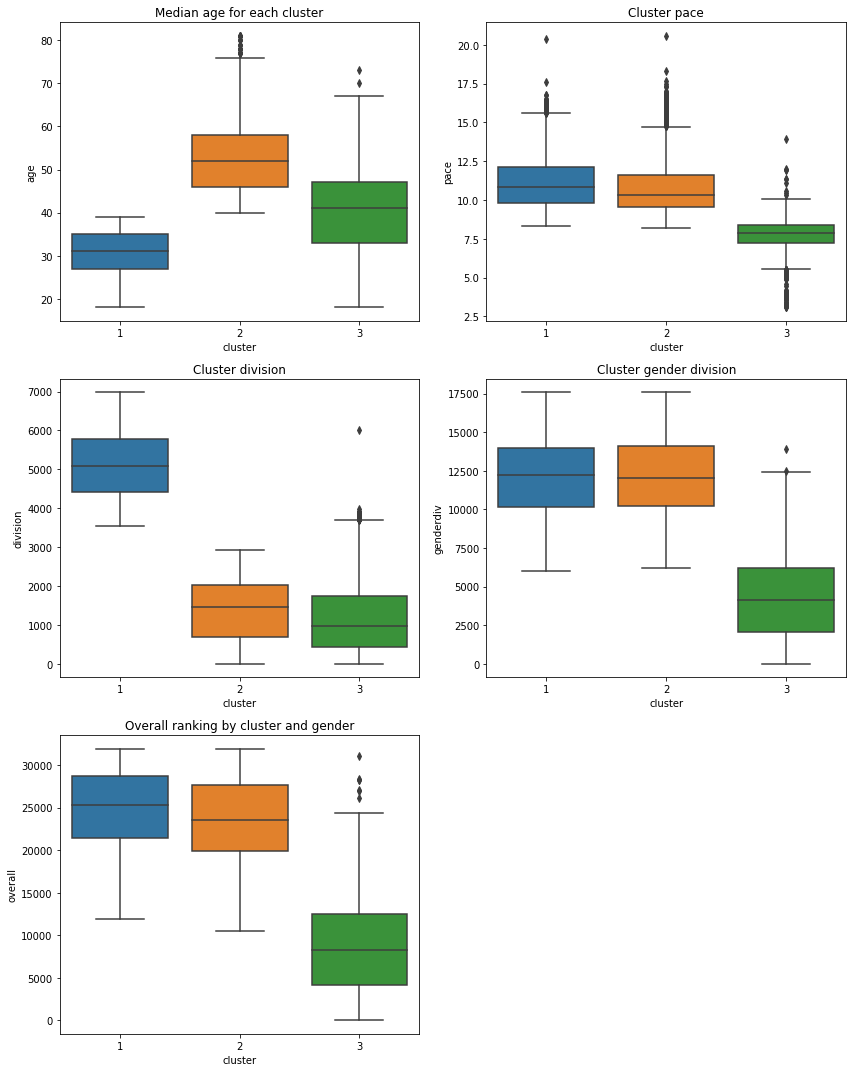

In [171]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x='cluster', y='age', data=data)
plt.title('Median age for each cluster')

plt.subplot(3, 2, 2)
sns.boxplot(x='cluster', y='pace', data=data)
plt.title('Cluster pace')

plt.subplot(3, 2, 3)
sns.boxplot(x='cluster', y='division', data=data)
plt.title('Cluster division')

plt.subplot(3, 2, 4)
sns.boxplot(x='cluster', y='genderdiv', data=data)
plt.title('Cluster gender division')

plt.subplot(3, 2, 5)
sns.boxplot(x='cluster', y='overall', data=data)
plt.title('Overall ranking by cluster and gender')

plt.tight_layout()
plt.show()


### Age
Cluster 1 represents participants under 40, cluster 2 is over 40, including outliers that stretch above 76/77 years old. Cluster 3 seems to run the entire range of ages but doesn't reach quite as high as cluster 2, having a few outliers as well going into the mid-70's.

### Pace
Pace reflects the same trend as the run times for each distance, as we would expect, being a measure of time taken to run a given distance. Cluster 3 is the lowest time, clusters 1 and 2 are very close, but 2 has a slightly lower median value. The boxplots have many outliers, all three have some above, cluster 3 is the only with outliers below the IQR.

### Division
The measure of a runner's rank in their division. Cluster 3 holds the lowest values or highest median division ranks, but cluster 2 is also very close. Here is another clear differentiation of clusters 1 and 2: 2 tends toward better division rank. Cluster 3 has a few outliers above the IQR.

### Gender Division
The measure of a runner's rank in their gender division. The gender division rank is pretty stable between clusters 1 and 2, but cluster 3 averages much lower values/higher ranks. Cluster 3 has a few outliers above the IQR.

### Overall
Overall rank of racers for the clusters follows the same trend as times: cluster 3 has the lowest values (highest ranks), clusters 1 and 2 are a bit higher up on the plot, the latter having just a slightly lower median

### State

In [173]:
states = pd.DataFrame()
states['state'] = sorted(data.state.unique())
states['cluster_1'] = np.array(data[data['cluster']==0].groupby('state').count()['cluster'] / data.groupby('state').count()['cluster'])
states['cluster_2'] = np.array(data[data['cluster']==1].groupby('state').count()['cluster'] / data.groupby('state').count()['cluster'])
states['cluster_3'] = np.array(data[data['cluster']==2].groupby('state').count()['cluster'] / data.groupby('state').count()['cluster'])
states.fillna(0, inplace=True)
states.head()

,state,cluster_1,cluster_2,cluster_3
0,AA,0.0,0.000000,0.000000
1,AB,0.0,0.038647,0.304348
2,AE,0.0,0.000000,0.285714
3,AK,0.0,0.060000,0.260000
4,AL,0.0,0.076190,0.419048


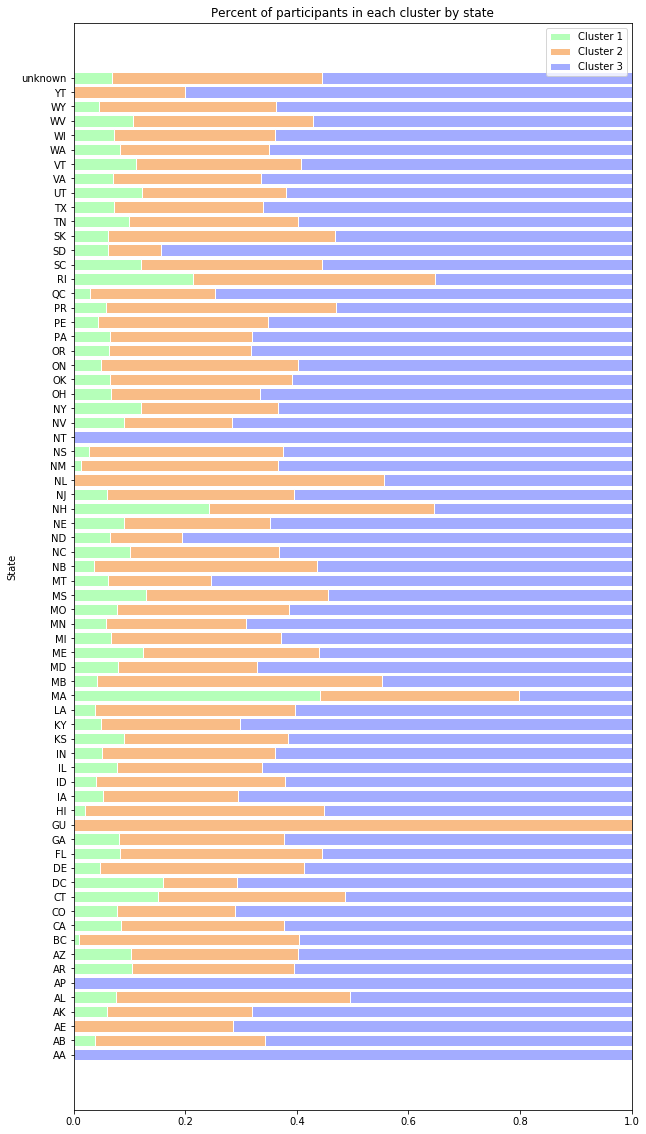

In [118]:
plt.figure(figsize=(10, 20))

# Create cluster_1 bars
plt.barh(states.state, states.cluster_1, color='#b5ffb9', edgecolor='white', label='Cluster 1')
# Create cluster_2 bars
plt.barh(states.state, states.cluster_2, left=list(states.cluster_1), color='#f9bc86', 
         edgecolor='white', label='Cluster 2')
# Create cluster_3 bars
plt.barh(states.state, states.cluster_3, left=[i+j for i,j in zip(states.cluster_1, 
        states.cluster_2)], color='#a3acff', edgecolor='white', label='Cluster 3')
 
plt.yticks(range(len(states.index)), states.state)
plt.ylabel("State")
plt.title('Percent of participants in each cluster by state')
plt.legend()
plt.show()

From the above plot, there's one interesting observation that stands out: the vast majority of participants in each state fall into cluster 3, the fastest group. However, Massachusetts and its most proximate two states, New Hampshire and Rhode Island, saw much higher rates of participation in clusters 1 and 2. 

I believe the story behind this is: people who are travelling from out of state to participate are going to be very serious about running. The bar to entry for local Bostonians and Massachusettsans is much lower, so many casual runners and such may join as a fun local activity. It's an interesting distinction the model makes, especially as I did not feed the 'state' column to my clustering model.

There are a few outlier "states," in which all points are only in one cluster. I have a feeling that these are caused by small sample sizes from these states, so I want to check into that:

In [209]:
data['state'].value_counts(ascending=True).head(10)

AA     1
AP     1
GU     1
NT     3
YT     5
AE     7
PR    17
NL    18
WY    22
PE    23
Name: state, dtype: int64

That pretty much sums up all the standout bars on the plot that didn't follow the typical distribution. The four bars with only one cluster represented were made up of fewer than 3 participants each! 


### Country

In [214]:
countries = pd.DataFrame()
countries['country'] = sorted(data.country.unique())
countries['cluster_1'] = np.array(data[data['cluster']==1].groupby('country').count()['cluster'] / data.groupby('country').count()['cluster'])
countries['cluster_2'] = np.array(data[data['cluster']==2].groupby('country').count()['cluster'] / data.groupby('country').count()['cluster'])
countries['cluster_3'] = np.array(data[data['cluster']==3].groupby('country').count()['cluster'] / data.groupby('country').count()['cluster'])
countries.fillna(0, inplace=True)
countries.head()

,country,cluster_1,cluster_2,cluster_3
0,ARG,0.000000,0.266667,0.733333
1,AUS,0.056452,0.290323,0.653226
2,AUT,0.045455,0.636364,0.318182
3,BAH,0.000000,1.000000,0.000000
4,BAR,0.000000,1.000000,0.000000


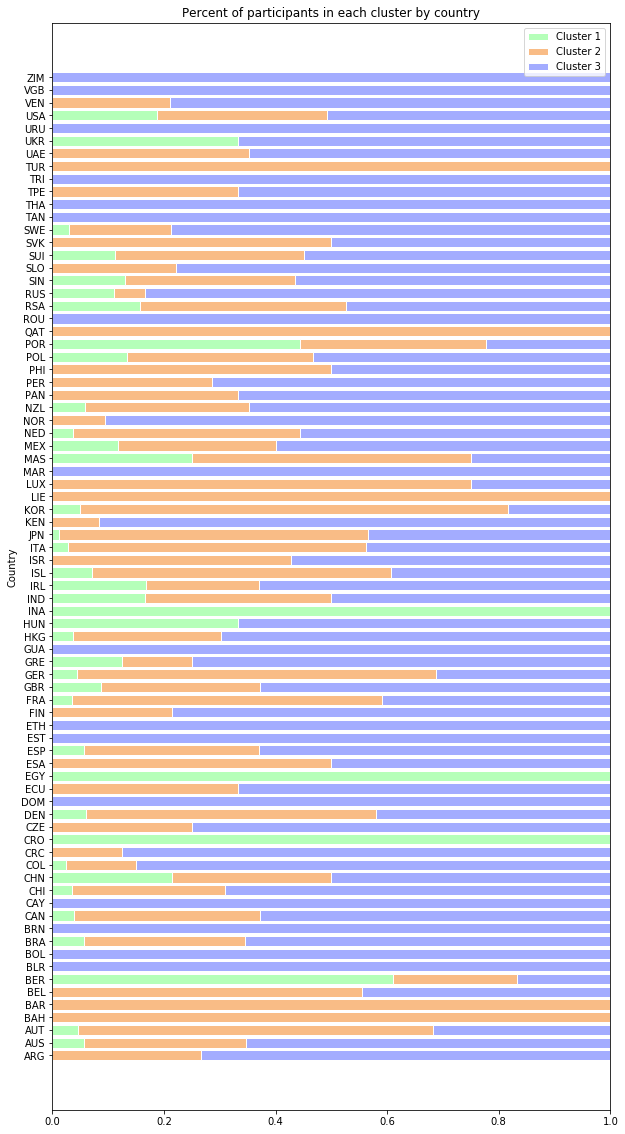

In [120]:
plt.figure(figsize=(10, 20))

# Create cluster_1 bars
plt.barh(countries.country, countries.cluster_1, color='#b5ffb9', edgecolor='white', 
         label='Cluster 1')
# Create cluster_2 bars
plt.barh(countries.country, countries.cluster_2, left=list(countries.cluster_1), 
         color='#f9bc86', edgecolor='white', label='Cluster 2')
# Create cluster_3 bars
plt.barh(countries.country, countries.cluster_3, left=[i+j for i,j in zip(countries.cluster_1, 
        countries.cluster_2)], color='#a3acff', edgecolor='white', label='Cluster 3')
 
plt.yticks(range(len(countries.index)), countries.country)
plt.ylabel("Country")
plt.title('Percent of participants in each cluster by country')
plt.legend()
plt.show()

There is a much wider variety of distributions in the countries plot than the US states plot we looked at before this. Cluster 3 obviously has the highest percentage of global participants, but there are many countries with only participants in clusters 1 or 2. On average, cluster 1 has the least participants, probably because it's expensive to travel and at a younger age, people are likely to have less money. 

For the countries with only values in one cluster, I'm curious to see if that can be explained by runner counts:

In [213]:
data['country'].value_counts(ascending=True).head(25)

INA    1
BAR    1
BRN    1
BOL    1
URU    1
LIE    1
CAY    1
BLR    1
MAR    1
CRO    1
ZIM    1
TAN    1
VGB    1
TRI    1
EST    1
THA    2
ESA    2
EGY    2
BAH    2
QAT    2
ROU    2
ECU    3
HUN    3
DOM    3
PAN    3
Name: country, dtype: int64

Above, the majority of the one-cluster countries in the plot above are represented in the above 25 country list. That helps to make some sense of the variety in the cluster distributions for countries plot and assuage some of the worry of extreme outliers.

## 3-cluster analysis

The clusters our model created are indeed interesting. I'll do my best to sum up what characterizes each. Overall, it can be said that the run times for male runners were consistently shorter than for female runners. Otherwise:

__Cluster 1__: Characterized by higher marathon run times for all measured distances. This is a younger group, from 18-40 years of age, that is 60% female. As expected, if their times are higher, their pace and division spots also tend to be higher than their counterparts. There are fewer participants in cluster 1 for almost every country and state. One notable exception is Massachusetts, the event location, and I explained earlier my reasoning for that. I think of cluster 1 as young, casual runners, mostly from the Boston/Massachusetts area.

__Cluster 2__: Characterized by slightly lower marathon run times than cluster 1 for all measured distances, and around 60% male. It's almost as if clusters 1 and 2 are two halves of the same coin, cluster 1 is participants below 40, cluster 2 is participants above 40. We see one notable difference between the two clusters in the 'division' ranking, where cluster 2 is closer to cluster 3, averaging much higher ranks than cluster 1. As far as the 'state' and 'country' columns, we see a greater percentage of participants from cluster 2 than cluster 1, but not as many as cluster 3. As I mentioned above, this may have to do with even the most serious older runners averaging a slower pace than their serious young counterparts. Or it could be free time (retirement) and greater resources than young people who, most likely, are raising children or paying student debt, buying houses, etc. Cluster 2 could be summed up as older runners, mostly male, either competitive or casual, that is undecided.

__Cluster 3__: I would call cluster 3 the competitive runners from around the world. The times for each distance are shorter by a considerable amount than the other two clusters, and the pace, division ranking, gender division ranking, and overall ranking reflect that. Additionally, we see that most participants from states other than Massachusetts and other countries fall into cluster 3 - the majority of people who travel for this marathon are serious runners.

### Building a 4-cluster model:

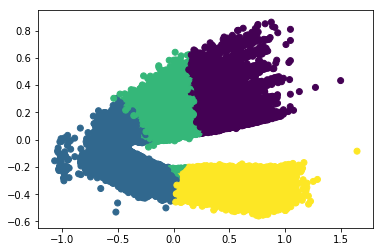

Comparing k-means clusters against the data:
col_0  0.000000  0.000031  0.000063  0.000094  0.000125  0.000157  0.000188  \
row_0                                                                         
0             0         0         0         0         0         0         0   
1             2         2         2         2         2         2         2   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   

col_0  0.000219  0.000251  0.000282  ...  0.999718  0.999749  0.999781  \
row_0                                ...                                 
0             0         0         0  ...         1         1         1   
1             2         2         2  ...         0         0         0   
2             0         0         0  ...         0         0         0   
3             0         0         0  ...         0         0         0   

col_0  0.999812  0.999843  0.999875

In [174]:
best_kmean4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,
                    tol=0.0001, random_state=5588)#, n_jobs=-1)
y_pred = best_kmean4.fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_norm))

In [178]:
data['4cluster'] = y_pred + 1

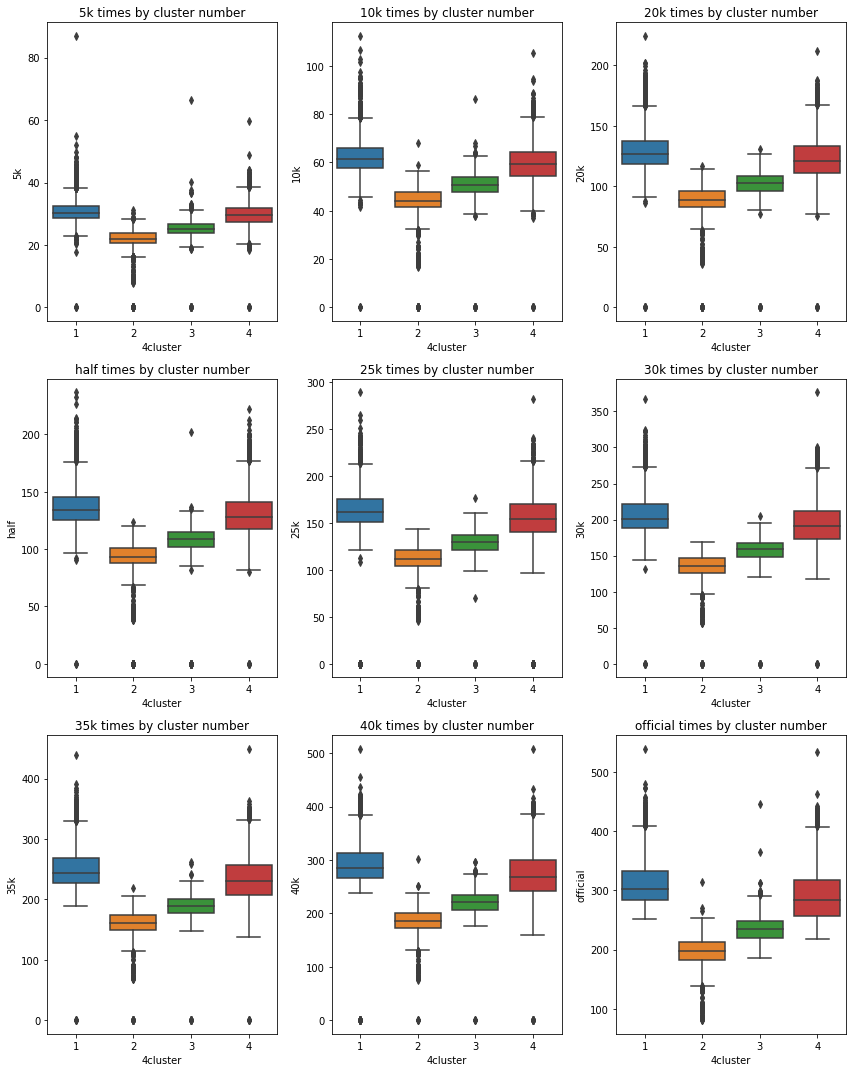

In [179]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='4cluster', y=dist, data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

Here, cluster 2 contains the fastest runners for all distances. It appears that clusters 1 and 4 are most similar to 1 and 2 from our 3 cluster analysis. Cluster 3 here seems to be a new addition: faster than 1 or 4, but not the fastest.

### Gender

In [199]:
# need to find percentage of men and women per cluster.
gender = pd.DataFrame(columns=['F', 'M'])
gender.loc['cluster_1'] = data[data['4cluster']==1].groupby('gender').count()['4cluster']/data[data['4cluster']==1].count()['4cluster']
gender.loc['cluster_2'] = data[data['4cluster']==2].groupby('gender').count()['4cluster']/data[data['4cluster']==2].count()['4cluster']
gender.loc['cluster_3'] = data[data['4cluster']==3].groupby('gender').count()['4cluster']/data[data['4cluster']==3].count()['4cluster']
gender.loc['cluster_4'] = data[data['4cluster']==4].groupby('gender').count()['4cluster']/data[data['4cluster']==4].count()['4cluster']

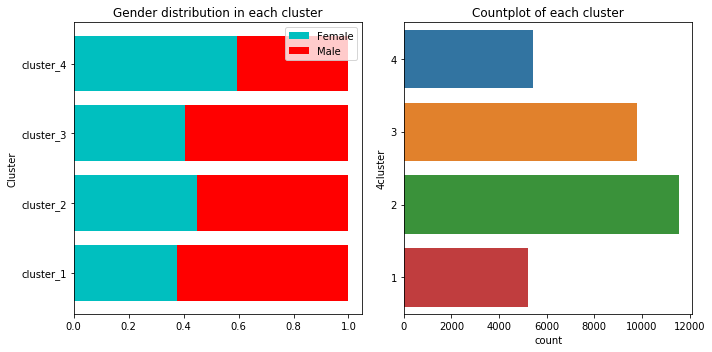

In [202]:
plt.subplots(1, 2, figsize=(10, 5))

# Stacked horizontal bar chart of percentages
plt.subplot(1, 2, 1)
plt.barh(gender.index, gender.F, color='c', label='Female')
plt.barh(gender.index, gender.M, left=gender.F, color='r', label='Male')
plt.title('Gender distribution in each cluster')
plt.ylabel('Cluster')
plt.legend()

# Countplot of clusters
plt.subplot(1, 2, 2)
sns.countplot(y='4cluster', data=data, order=[4, 3, 2, 1])
plt.title("Countplot of each cluster")
plt.tight_layout()
plt.show()

Here we have a pretty similar breakdown of the clusters by gender. Again we have one smaller cluster (4) that is majority female, while the rest are majority male. We have one small (1) and two large (2, 3) majority male clusters.

### Other columns:

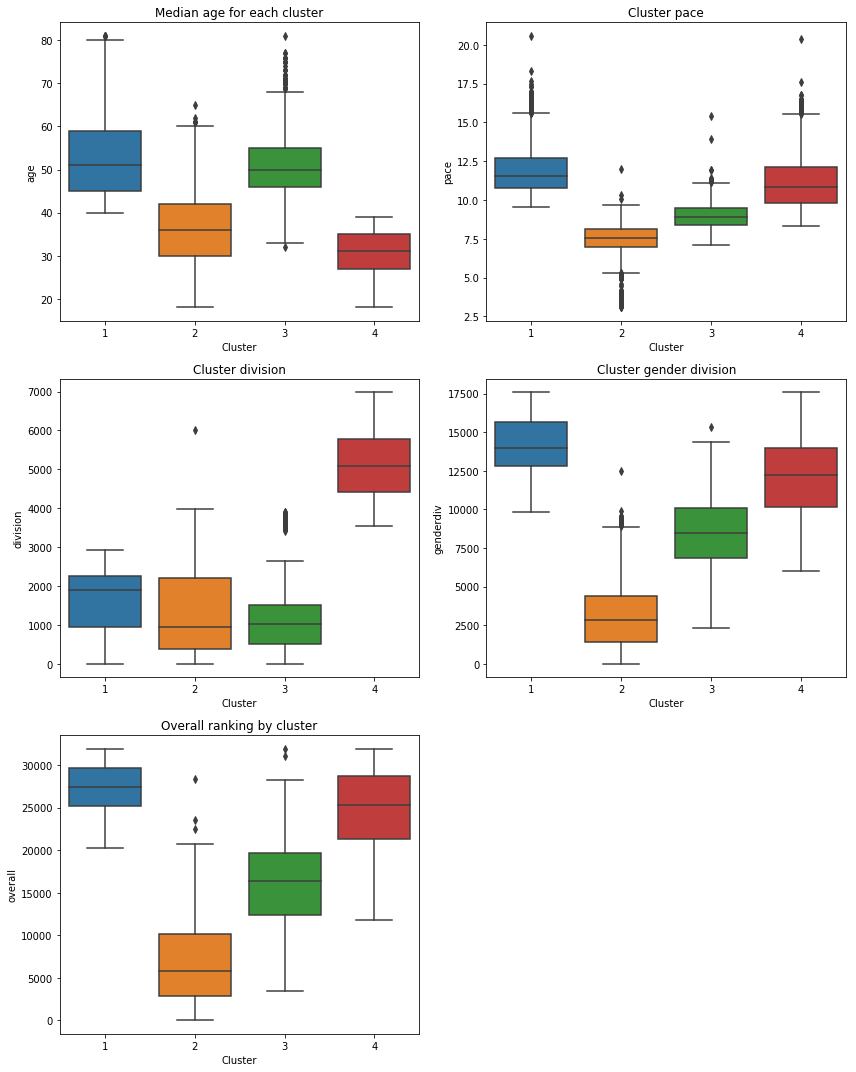

In [184]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x='4cluster', y='age', data=data)
plt.xlabel('Cluster')
plt.title('Median age for each cluster')

plt.subplot(3, 2, 2)
sns.boxplot(x='4cluster', y='pace', data=data)
plt.xlabel('Cluster')
plt.title('Cluster pace')

plt.subplot(3, 2, 3)
sns.boxplot(x='4cluster', y='division', data=data)
plt.xlabel('Cluster')
plt.title('Cluster division')

plt.subplot(3, 2, 4)
sns.boxplot(x='4cluster', y='genderdiv', data=data)
plt.xlabel('Cluster')
plt.title('Cluster gender division')

plt.subplot(3, 2, 5)
sns.boxplot(x='4cluster', y='overall', data=data)
plt.xlabel('Cluster')
plt.title('Overall ranking by cluster')

plt.tight_layout()
plt.show()


### Age
For age, we can see two clusters tend toward younger participants, two tend toward older participants. Clusters 1 and 4 seem to share a similar relatiomship to clusters 1 and 2 from our 3 cluster analysis: in cluster 4 all participants are below 40 years of age, and in cluster 1 they are all above 40 years of age. Cluster 2 tends to be younger than cluster 3 by about 15 years. So we have an older fast group (cluster 3), which is not as fast as our younger fast group (cluster 2).

### Cluster Pace
Pace again reflects the distribution from the distance subplots before this. Clusters 1 and 4 have the slowest paces, followed by cluster 3, then cluster 2 at the fastes paces.

### Cluster Division
This distribution looks a bit similar to our 3 cluster model. The division rankings don't seem to fall in line with the runner's time/speed so much. The median for cluster 2 is slightly lower than cluster 3, though, which represents our overall trend. Cluster 4 has the highest median division ranking. 

### Cluster Gender Division
Gender Division follows the same distribution as the distances and pace: Cluster 2 in the lead, cluster 3 behind that, clusters 1 and 4 are the highest(slowest).

### Overall Rank
Overall ranking also follows the above distribution (cluster gender division), no surprises.

### State

In [215]:
states4 = pd.DataFrame()
states4['state'] = sorted(data.state.unique())
states4['cluster_1'] = np.array(data[data['4cluster']==1].groupby('state').count()['4cluster'] / data.groupby('state').count()['4cluster'])
states4['cluster_2'] = np.array(data[data['4cluster']==2].groupby('state').count()['4cluster'] / data.groupby('state').count()['4cluster'])
states4['cluster_3'] = np.array(data[data['4cluster']==3].groupby('state').count()['4cluster'] / data.groupby('state').count()['4cluster'])
states4['cluster_4'] = np.array(data[data['4cluster']==4].groupby('state').count()['4cluster'] / data.groupby('state').count()['4cluster'])
states4.fillna(0, inplace=True)
states4.head()

,state,cluster_1,cluster_2,cluster_3,cluster_4
0,AA,0.000000,1.000000,0.000000,0.000000
1,AB,0.086957,0.444444,0.429952,0.038647
2,AE,0.000000,0.571429,0.428571,0.000000
3,AK,0.060000,0.380000,0.500000,0.060000
4,AL,0.219048,0.333333,0.371429,0.076190


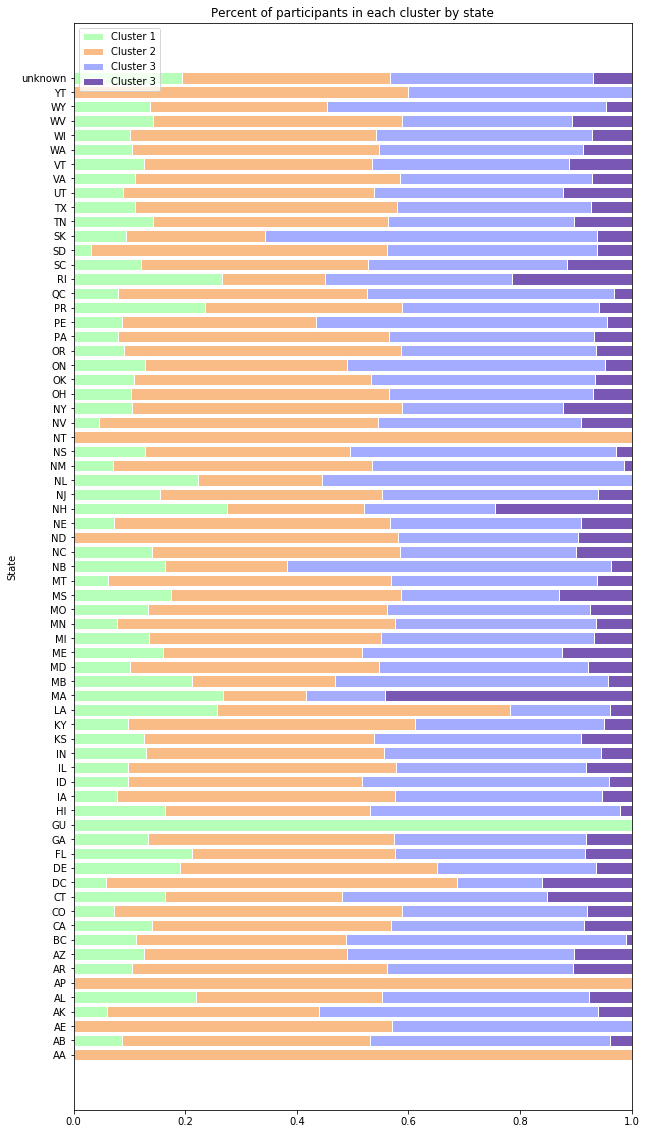

In [217]:
plt.figure(figsize=(10, 20))

# Create cluster_1 bars
plt.barh(states4.state, states4.cluster_1, color='#b5ffb9', edgecolor='white', label='Cluster 1')
# Create cluster_2 bars
plt.barh(states4.state, states4.cluster_2, left=list(states4.cluster_1), color='#f9bc86', 
        edgecolor='white', label='Cluster 2')
# Create cluster_3 bars
plt.barh(states4.state, states4.cluster_3, left=[i+j for i,j in zip(states4.cluster_1, 
        states4.cluster_2)], color='#a3acff', edgecolor='white', label='Cluster 3')
# Create cluster_4 bars
plt.barh(states4.state, states4.cluster_4, left=[i+j+k for i,j,k in zip(states4.cluster_1, 
        states4.cluster_2, states4.cluster_3)], color='#7958b3', edgecolor='white', 
        label='Cluster 3')
    
plt.yticks(range(len(states4.index)), states4.state)
plt.ylabel("State")
plt.title('Percent of participants in each cluster by state')
plt.legend()
plt.show()

We have fairly consistent distribution of the four clusters across different states/territories. The outlier states with only one or two clusters are the same as last time - only 5 states/territories that qualify. We see that most of the participants from each state fall into clusters 2 and 3, our two fastest clusters. Again, Massachusetts has higher ratios of slower/less competitive runners (clusters 1 and 4), as do neighboring states New Hampshire (NH) and Maine (MN).

### Country

In [219]:
countries4 = pd.DataFrame()
countries4['country'] = sorted(data.country.unique())
countries4['cluster_1'] = np.array(data[data['4cluster']==1].groupby('country').count()['4cluster'] / data.groupby('country').count()['4cluster'])
countries4['cluster_2'] = np.array(data[data['4cluster']==2].groupby('country').count()['4cluster'] / data.groupby('country').count()['4cluster'])
countries4['cluster_3'] = np.array(data[data['4cluster']==3].groupby('country').count()['4cluster'] / data.groupby('country').count()['4cluster'])
countries4['cluster_4'] = np.array(data[data['4cluster']==4].groupby('country').count()['4cluster'] / data.groupby('country').count()['4cluster'])
countries4.fillna(0, inplace=True)
countries4.head()

,country,cluster_1,cluster_2,cluster_3,cluster_4
0,ARG,0.133333,0.600000,0.266667,0.000000
1,AUS,0.145161,0.483871,0.314516,0.056452
2,AUT,0.272727,0.181818,0.500000,0.045455
3,BAH,0.500000,0.000000,0.500000,0.000000
4,BAR,0.000000,0.000000,1.000000,0.000000


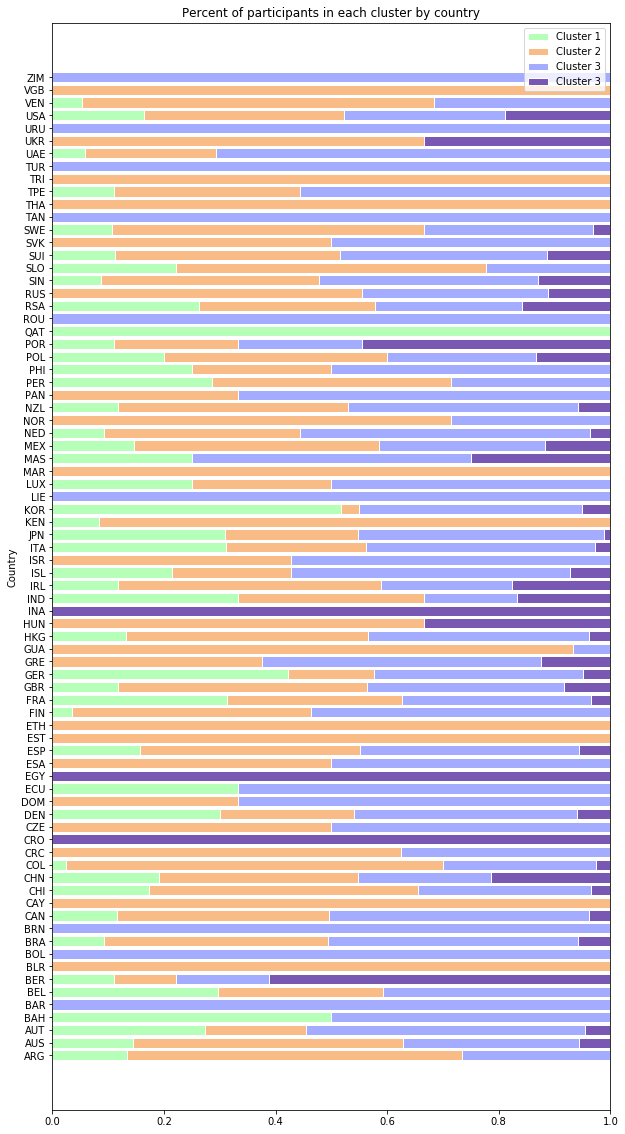

In [220]:
plt.figure(figsize=(10, 20))

# Create cluster_1 bars
plt.barh(countries4.country, countries4.cluster_1, color='#b5ffb9', edgecolor='white', 
         label='Cluster 1')
# Create cluster_2 bars
plt.barh(countries4.country, countries4.cluster_2, left=list(countries4.cluster_1), 
         color='#f9bc86', edgecolor='white', label='Cluster 2')
# Create cluster_3 bars
plt.barh(countries4.country, countries4.cluster_3, left=[i+j for i,j in zip(countries4.cluster_1, 
         countries4.cluster_2)], color='#a3acff', edgecolor='white', label='Cluster 3')
# Create cluster_4 bars
plt.barh(countries4.country, countries4.cluster_4, 
         left=[i+j+k for i,j,k in zip(countries4.cluster_1, countries4.cluster_2, 
         countries4.cluster_3)], color='#7958b3', edgecolor='white', label='Cluster 3')

plt.yticks(range(len(countries4.index)), countries4.country)
plt.ylabel("Country")
plt.title('Percent of participants in each cluster by country')
plt.legend()
plt.show()

With the countries we also see a similar distribution of clusters as we did with the 3 cluster model and the states. Clusters 2 and 3, which are characterized by lower times/faster runners, make up the majority of the participants from around the world. Again, this is sensible. Clusters 1 and 4 represent a much smaller proportion of the runners as they are both made up of slower runners. 

There are just over 20 bars represented by only one or two clusters, most of which are on the list we saw earlier when we did the 3 cluster analysis: most are just very small pools of participants.

## Final 4 Cluster Analysis

We saw some similar distributions among clusters in our 3 and 4 cluster models, but it's not so simple as splitting one of the old clusters into two new ones. There was some shuffling about of runners into different clusters, so we'll have to reassess what makes each cluster unique:

__Cluster 1__: The smallest cluster in terms of number of rows, cluster 1 is over 60% male. These runners are the oldest group, with everyone being over 40 years old. The slowest runners (longest times) are members of this cluster and cluster 4. While the median run times are slightly higher for this cluster than cluster 4, the division rankings are much lower in cluster 1. But, the gender division rankings are the highest (worst). 

About 15% of US/Canadian participants are in cluster 1. Many countries send a high percentage of runners who are in cluster 1 (around 30%). Looking closer, some are represented by only a few runners, and I am inferring the many of the other countries tend to have higher GDP or middle/upper class populations. This includes many European countries (FRA, ITA, GER, DEN, POL, etc.), developed East Asian countries (JPN, KOR), and quickly developing Asian countries (CHN, IND).

We can say this is a smaller, older, slower cluster that is mostly male. It represents many runners from Massachusetts. These may be more casual runners as they aren't as fast.

__Cluster 2__: This cluster is the largest in number of members and the fastest (lowest times). The age range is quite wide, but does not contain the oldest participants (IQR stops at 60). Gender is the most balanced of any of the clusters, about 44% female/56% male. The largest number of participants from most states and most countries come from cluster 2. This cluster is more serious runners (which, understandably) makes up the largest group in an internationally renown marathon.

__Cluster 3__: Cluster 3 is the second largest and contains the second-fastest group of runners. The age range is pretty spread out, but all above 30 and extends all the way up to some of the oldest. Pace, gender division, and overall ranking all represent the same trend as the run times: above cluster 2, below clusters 1 and 4. The regular division ranking is slightly higher than cluster 2, slightly lower than cluster 1, and much lower than cluster 4. Cluster 3 is the second most represented cluster for almost all states. Many countries also show a large proportion of cluster 3 runners, but there is much more variance between countries. Overall, this cluster is a large group of serious runners who are slightly older than cluster 2. I would say those two clusters represent more passionate/fast runners, and the greatest distinction is age (cluster 2 being younger, on average).

__Cluster 4__: The final cluster is the only one that is majority female. It's a smaller cluster, and tends toward longer times, but not as long as cluster 1. This is the youngest cluster, with all participants below 40. This cluster has the highest gender division values (which may be related to its unique gender distribution). Otherwise its pace, division score, and overall ranking follow the same pattern as its times. For most states, cluster 4 is the least represented, Massachusetts being the largest exception. There are very few international runners in cluster 4, with some exceptions. Cluster 4 represents young, mostly female, casual/amature runners, many of whom are from Massachusetts/Boston area. 

